In [10]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
import matplotlib.pyplot as plt


In [2]:
superherofacts = TextLoader('./docs/superhero_facts.txt')
superherofacts_document = superherofacts.load()[0]
superherofacts_data = superherofacts_document.page_content

In [3]:
def extract_character_names(text):
    paragraphs = text.split('\n')
    return [para.split()[0:2] for para in paragraphs if para.strip()]

In [4]:
power_splitter = CharacterTextSplitter(
    separator=".",
    chunk_size=150,
    chunk_overlap=0
)

In [5]:
bio_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " "],
    chunk_size=800,
    chunk_overlap=200,
    length_function=len
)

In [6]:
level1_chunks_characternames = extract_character_names(superherofacts_data)
level2_chunks_powersummary = power_splitter.split_text(superherofacts_data)
level3_chunks_characterbio = bio_splitter.split_text(superherofacts_data)

Created a chunk of size 162, which is longer than the specified 150
Created a chunk of size 159, which is longer than the specified 150


In [9]:
# Print the hierarchical chunks
print("Level 1 (Character Names):")
for i, chunk in enumerate(level1_chunks_characternames, 1):
    print(f"  Chunk {i}: {' '.join(chunk)}")

print("\nLevel 2 (Power Summaries):")
for i, chunk in enumerate(level2_chunks_powersummary, 1):
    print(f"  Chunk {i}: {chunk}")

print("\nLevel 3 (Full Bios):")
for i, chunk in enumerate(level3_chunks_characterbio, 1):
    print(f"  Chunk {i}: {chunk[:100]}...") # Truncated for brevity

Level 1 (Character Names):
  Chunk 1: Ant-Man (Hank
  Chunk 2: Aquaman's real
  Chunk 3: Bane was
  Chunk 4: Batwoman (Helena
  Chunk 5: Black Panther
  Chunk 6: Buffy Summers
  Chunk 7: Captain America
  Chunk 8: Captain America
  Chunk 9: Captain Planet
  Chunk 10: Catwoman (Injustice)

Level 2 (Power Summaries):
  Chunk 1: Ant-Man (Hank Pym) discovered subatomic particles known as "Pym Particles." He created serums that could shrink or grow objects and people
  Chunk 2: Additionally, he developed a cybernetic helmet to communicate with ants. Using his size-changing abilities, he battled various villains like Egghead
  Chunk 3: He is also a founding member of the Avengers alongside Wasp.
Aquaman's real name is Arthur Curry, also known as Orin
  Chunk 4: He is the telepathic ruler of Atlantis and the Earth's oceans, possessing superhuman strength, speed, and the ability to command sea life
  Chunk 5: As a founding member of the Justice League of America, his most consistent nemesis is

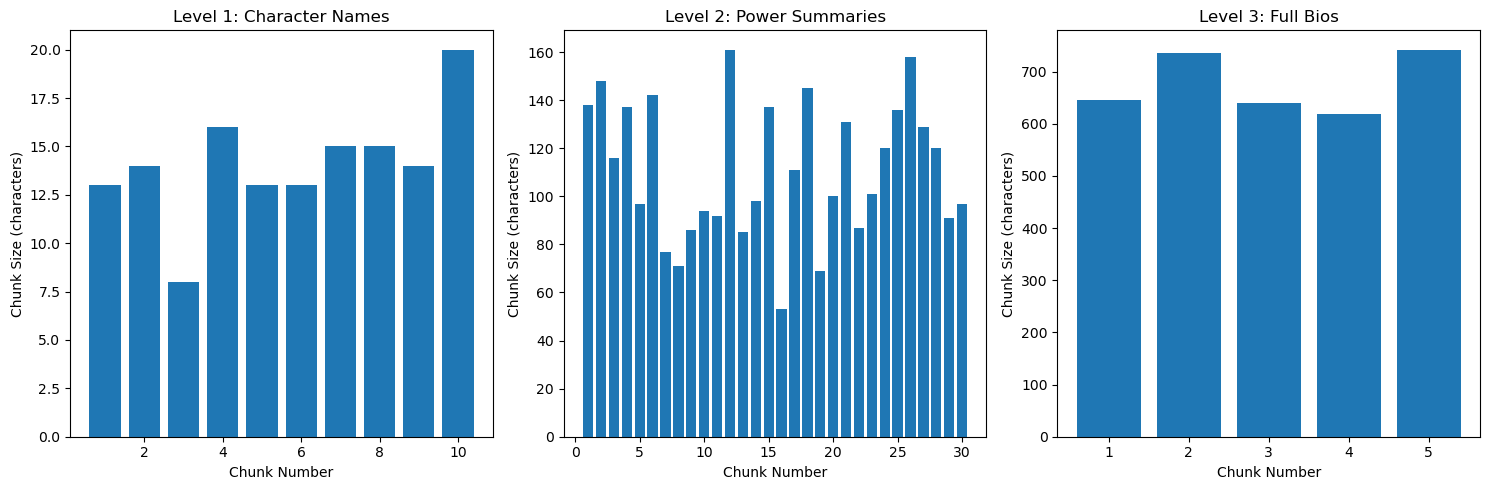

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(range(1, len(level1_chunks_characternames) + 1), [len(' '.join(chunk)) for chunk in level1_chunks_characternames])
plt.title('Level 1: Character Names')
plt.xlabel('Chunk Number')
plt.ylabel('Chunk Size (characters)')

plt.subplot(132)
plt.bar(range(1, len(level2_chunks_powersummary) + 1), [len(chunk) for chunk in level2_chunks_powersummary])
plt.title('Level 2: Power Summaries')
plt.xlabel('Chunk Number')
plt.ylabel('Chunk Size (characters)')

plt.subplot(133)
plt.bar(range(1, len(level3_chunks_characterbio) + 1), [len(chunk) for chunk in level3_chunks_characterbio])
plt.title('Level 3: Full Bios')
plt.xlabel('Chunk Number')
plt.ylabel('Chunk Size (characters)')

plt.tight_layout()
plt.show()